In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from scipy import stats

# Simulations

## Simulating mean read segment length according to unmodified epinano reads

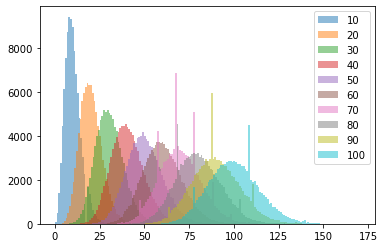

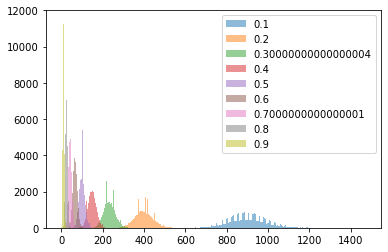

In [2]:
for i in range(10, 110, 10):
    dist = np.random.negative_binomial(i, 0.5, size = 100000)
    plt.hist(dist, bins = len(np.unique(dist)) + 1, alpha = 0.5, label = i)
plt.legend()
plt.show()
plt.close()

for i in np.arange(0.1, 1, 0.1):
    dist = np.random.negative_binomial(100, i, size = 100000)
    plt.hist(dist, bins = len(np.unique(dist)) + 1, alpha = 0.5, label = i)
plt.legend()
plt.show()

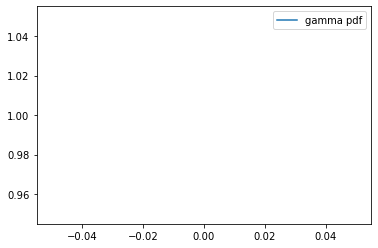

In [18]:
# dist = np.random.gamma(45, 1.5, 100000)
y = stats.gamma.pdf(1, 1, 1)
# plt.hist(dist, bins = 1000, label = 'random gamma')#), alpha = 0.5, label = i)
plt.plot(y, label = 'gamma pdf')
plt.legend()
plt.show()
plt.close()

## Simulating read segment length distribution according to some epinano reads
Read segment lengths follow a discrete (integer) exponential distribution
- scale = 1/lambda ~ mean segment length of the read

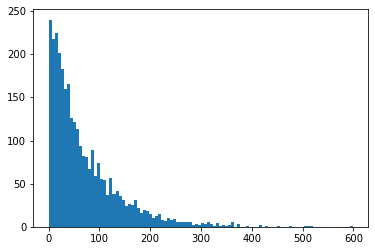

In [3]:
dist = np.random.exponential(scale = 30, size = 3000).astype(int)
plt.hist(dist, bins = 100)
plt.show()

# Code

In [33]:
rna_models = os.path.join('..', 'data', 'template_median69pA.model')
# nice way to simulate random RNA strand
reference = "A" * 50 + ''.join(random.choices('ACGT', k=2000))
print(reference)

AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAATCGACCTTAACTTTCAAGGGCGCCATCGAAGTAAAGCTCTGCGCTTACCATATCCACCGATTTGGTGAACTTCCTTTCCGGTCGACCGTACAGATCTAAGGAATCAGTGGCATAGATTCTCCTAGGGCTAACATCGCGAACTACCACACATAAAGTACATGCGAGGAACCACCCTGCAATGGCACCACCTGATTAAAACACTCTAACGGAGGCTTCCGCATCAGTAAGCGATCGGTGGCTAAGGGAAGTTCCACCGCCGACTTCACCCACACCTCAGACCATGCCAGAAGTTCCAGCACCTCTGATCGATGTTGTGTTCTATTGTTGACGTAAGGACGGACCACCGGACAAACTGGCGCACATCGCTCACCGGCATGCTCGCGGCAGGACCGGCCAACCATTGGAGGGTACTGGTCAAGTCAACTAGCCGGGGTGTTGTGTCCGGGAGCTGCCGCGGGCTAGGTGTAGCCCCCAAACAAGGTTTTGCCCTTGTGTTCATGAGGTGGGTTGATTCTGATATAGCGTTTGAAGTAGCGGAATGCTGGAAGCACCCATATTACTCAAGTGTCGGCAGAAGTCAAACTCCCAATCCAACCATATGAATTACGCCCCTACGTGGGGGCACTTCGGTGGTGTTATCAAGCGCATATTCCAAAGTAGACCAGGCTATAGAGATATGAGAGTATCTTGGTAACTGGTCGCATGTCGGTGCGTTACGGTTGAGTACAGTTGCATTACTCGCTATCCACTTGTTGCTCGGCTGACCAGTTATCAAGCTTTTAATCATTTAAACGCCTGACAAACTCTCGGTTCACTCTGACAGATTTGCTAGGGGGACCTTTATGCATCGTATTAGACGCATCCCAACAGAGTGAAGCCTTCGTCCAGATGTAGACATTTCGCTCTAATCATCAAAAATTGATATCGAGAGGCGTCTTCCTTGCAGCG

In [34]:
df = pd.read_csv(rna_models, sep='\t')
dic = {key : (mean, std) for key, mean, std in zip(df['kmer'], df['level_mean'], df['level_stdv'])}

In [35]:
sim_signal = []
borders = [0]
last_border = 0

for n in range(len(reference) - 5):
    kmer = reference[n:n+5]
    # segment lengths seem to follow the exponential function with scale = 1/lambda ~ 58.475 (source: median of the segment means of all reads of the epinano RNA (mod) dataset), we need to discretise it
    segment_length = np.random.exponential(55.7, 1).astype(int)
    last_border += segment_length
    borders.append(last_border.item())

    sim_signal.extend(np.random.normal(dic[kmer][0], dic[kmer][1], segment_length))

sim_signal = np.array(sim_signal)

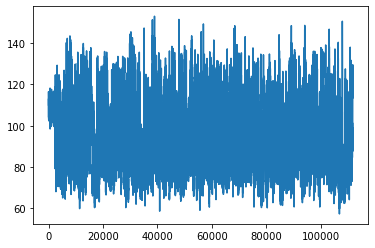

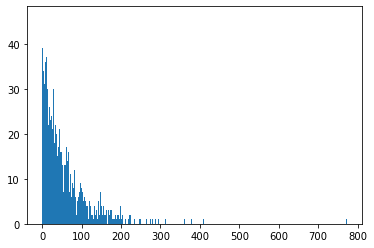

In [36]:
plt.plot(sim_signal)
plt.show()

plt.hist(np.diff(borders), bins = max(np.diff(borders)))
plt.show()

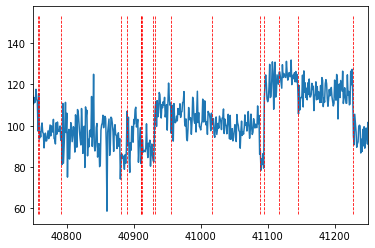

In [41]:
plt.plot(sim_signal)
plt.vlines(borders, ymin = min(sim_signal), ymax=max(sim_signal), color = 'red', linestyle = '--', linewidth = 0.8)
plt.xlim((40750, 41250))
plt.show()